# Data Screening

Steve Purves [](https://orcid.org/0000-0002-0760-5497)  
Charlotte Wickham

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Import `la-palma.csv` - a clean subset of [`catalogoComunSV_1663233588717.csv`](https://github.com/Notebooks-Now/submission-quarto-full/blob/main/data/catalogoComunSV_1663233588717.csv):

In [ ]:
df = pd.read_csv("la-palma.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.sort_values(by=["DateTime"], ascending=True)
df.head()

In [4]:
df.describe()

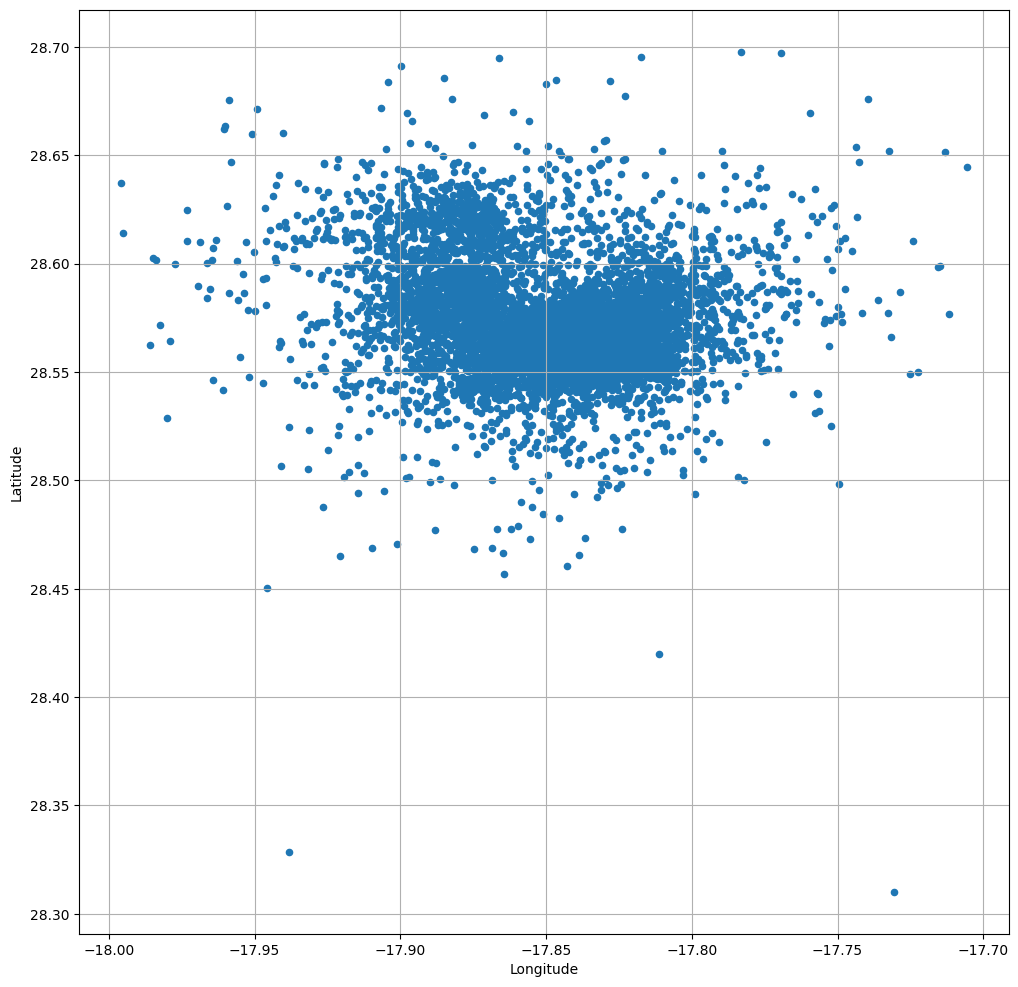

In [ ]:
df.plot.scatter(x="Longitude", y="Latitude", figsize=(12, 12), grid="on");

### Filter

Also some rows seem to be missing depth measurements, (see differences in the **count** for columns above) - take only rows with valid depths

In [ ]:
df = df[df["Depth(km)"].notna()]
df.describe()

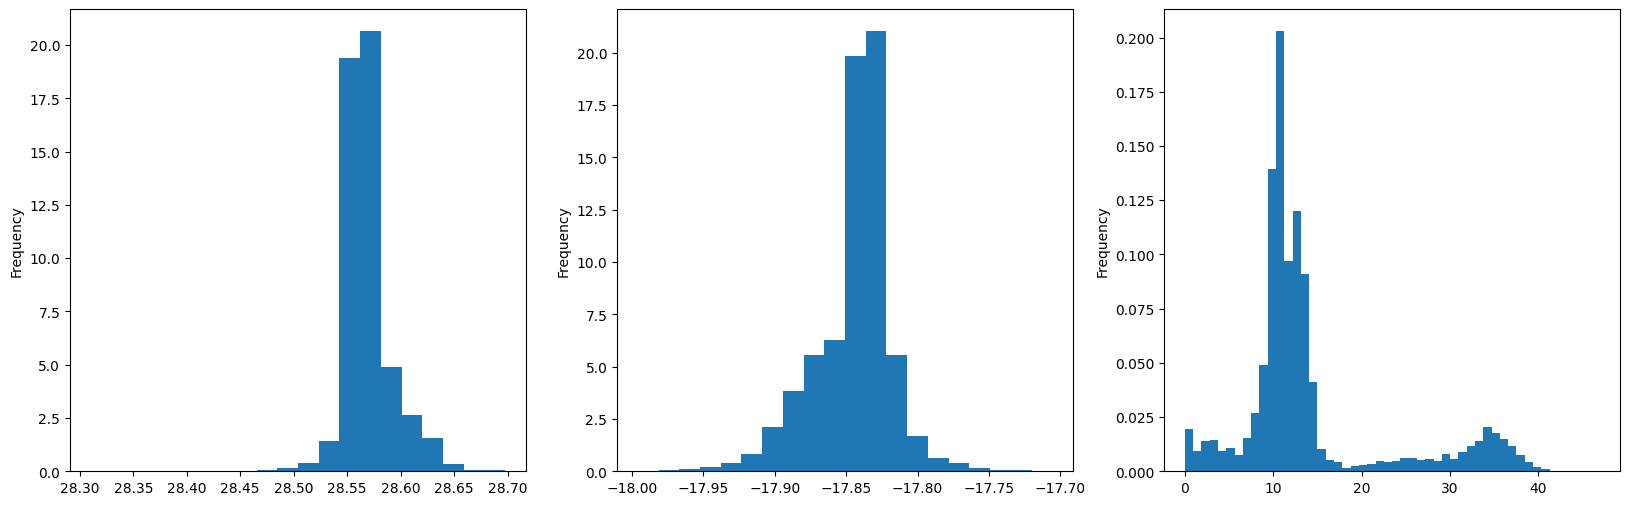

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
df["Latitude"].plot.hist(bins=20, density=True)
plt.subplot(1, 3, 2)
df["Longitude"].plot.hist(bins=20, density=True)
plt.subplot(1, 3, 3)
df["Depth(km)"].plot.hist(bins=50, density=True)

## Spatial Plot

Scatter plot the spatial locations of events

In [ ]:
from matplotlib import colormaps

cmap = colormaps["viridis_r"]
ax = df.plot.scatter(
    x="Longitude",
    y="Latitude",
    s=47 - df["Depth(km)"],
    c=df["Magnitude"],
    figsize=(12, 10),
    grid="on",
    cmap=cmap,
)
colorbar = ax.collections[0].colorbar
colorbar.set_label("Magnitude")

plt.show()

### Timeline Plot

Scatter plot the event time series and look for any quantization issues. Have times & dates been loaded correctly?

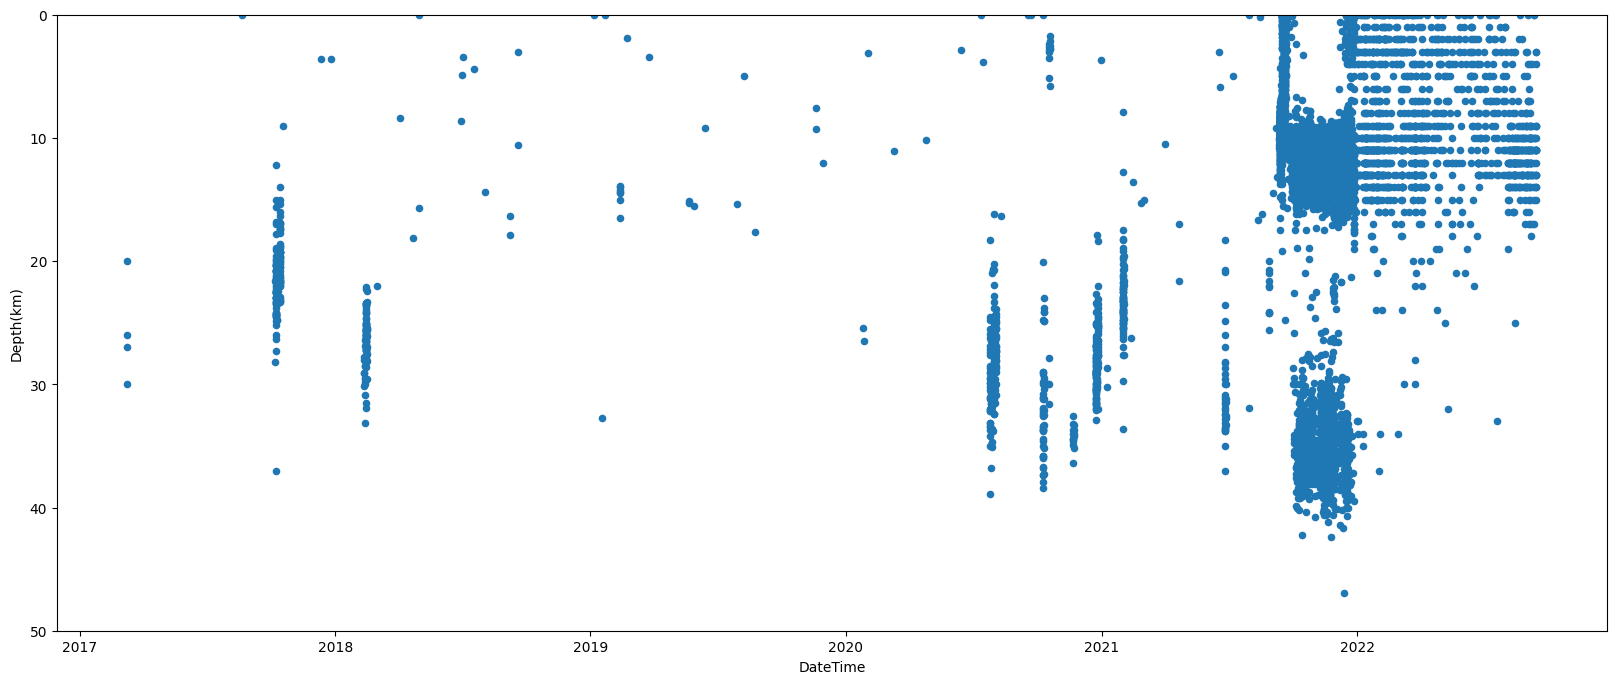

In [ ]:
ax = df.plot.scatter(x="DateTime", y="Depth(km)", figsize=(20, 8))
ax.set_ylim(50, 0);